<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/Sentiment_Analysis_of_Shopee_product_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Shopee product reviews
## English reviews are using 4 pre-trained machine learning models
1. Huggingface Pipeline<br>
The pipelines are a great and easy way to use models for inference. These pipelines are objects that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, including Named Entity Recognition, Masked Language Modeling, Sentiment Analysis, Feature Extraction and Question Answering<br>
https://huggingface.co/transformers/main_classes/pipelines.html
2. VADER<br>
Valence Aware Dictionary and sEntiment Reasoner is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
VADER uses a combination of a sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.<br>
https://github.com/cjhutto/vaderSentiment
3. Flair<br>
Flair’s sentiment classifier is based on a character-level LSTM neural network which takes sequences of letters and words into account when predicting
Allows you to apply state-of-the-art natural language processing (NLP) models to sections of text. It works quite differently to the previously mentioned models. 
Flair utilizes a pre-trained model to detect positive or negative comments and print a number in brackets behind the label which is a prediction confidence.<br>
https://github.com/flairNLP/flair
4. Textblob<br>
Textblob’s Sentiment Analysis works in a similar way to NLTK — using a bag of words classifier, but the advantage is that it includes Subjectivity Analysis too (how factual/opinionated a piece of text is)<br>
https://textblob.readthedocs.io/en/dev/
<br>

## Bahasa Melayu reviews are using 1 pre-trained machine learning model
1. Malaya<br>
A Natural-Language-Toolkit library for Bahasa Malaysia, powered by Deep Learning Tensorflow.
Malaya provided basic interface for Pre-trained Transformer encoder models, specific to Malay, local social media slang and Manglish language, called Transformer-Bahasa.<br>
https://malaya.readthedocs.io/en/latest/

In [ ]:
%pip -q install tabulate
%pip -q install textblob
%pip -q install google_trans_new
%pip -q install flair
%pip -q install malaya

In [ ]:
import re
import requests
import pandas as pd
from tabulate import tabulate
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import flair
import malaya
import json
from google_trans_new import google_translator
from transformers import pipeline
import matplotlib.pyplot as plt
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/usr/local/lib/python3.7/dist-packages/malaya/function/__init__.py:32: UserWarning: Cannot import beam_search_ops not available for Tensorflow 2, `deep_model` for stemmer will not available to use.
  'Cannot import beam_search_ops not available for Tensorflow 2, `deep_model` for stemmer will not available to use.'


In [ ]:
# Using stacking model for better results
bert = malaya.sentiment.transformer('bert')
tinybert = malaya.sentiment.transformer('tiny-bert')
albert = malaya.sentiment.transformer('albert')
tinyalbert = malaya.sentiment.transformer('tiny-albert')
xlnet = malaya.sentiment.transformer('xlnet')
alxlnet = malaya.sentiment.transformer('alxlnet')

In [112]:
url = input("Enter the Shopee product URL: ")
# # Example: https://shopee.com.my/Acer-Aspire-3-A315-35-15.6-Laptop-(Celeron-N4500-4GB-256GB-Intel)-(Windows-10-Pro-Basic-Installation)-i.268863847.4038359450

Enter the Shopee product URL: https://shopee.com.my/TTRacing-Swift-X-2020-Gaming-Chair-i.296677843.5646712777


In [113]:
#url = 'https://shopee.com.my/-Bundle-Microsoft-Surface-Pro-7-Platinum-(i5-1035G4-Intel-Iris-Plus-Graphics-8GB-128GB-12.3-Windows-10)-i.154568882.4433101145'
#url = 'https://shopee.com.my/Acer-Aspire-3-A315-35-15.6-Laptop-(Celeron-N4500-4GB-256GB-Intel)-(Windows-10-Pro-Basic-Installation)-i.268863847.4038359450'
#url = 'https://shopee.com.my/%E3%80%90EXP-MAY-2021%E3%80%91Nongshim-Shin-Ramyun-Korea-Ramen-5-Pack-%E9%9F%A9%E5%9B%BD%E8%BE%9B%E6%8B%89%E9%9D%A2%E6%B3%A1%E8%8F%9C%E9%9D%A2-Instant-Spicy-Noodle-Soup-i.39931794.2920958018'
#url = 'https://shopee.com.my/Verbatim-New-Slider-USB-2.0-Flash-Drive-Pendrive-16GB-32GB-i.143275520.2312604078'
#url = "https://shopee.com.my/Scott's-Vitamin-C-Pastilles-Orange-(50s)-i.21516516.297088349"

numberInURL = re.findall('\d+', url)
itemid = numberInURL[-1]
shopid = numberInURL[-2]
print("Shop ID: ", shopid)
print("Item ID: ", itemid)

Shop ID:  296677843
Item ID:  5646712777


In [114]:
ratings_url = 'https://shopee.com.my/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=20&offset={offset}&shopid={shop_id}&type=0'

komen = []
offset = 0

while True:
    data = requests.get(ratings_url.format(shop_id=shopid, item_id=itemid, offset=offset)).json()

    # uncomment this to print all data:
    # print(json.dumps(data, indent=4))

    i = 1
    for i, rating in enumerate(data['data']['ratings'], 1):
      #if len(rating['comment']) > 2:
        #print(i, rating['comment'])
        #print('-' * 80)
        komen.append(rating['comment'])
    if i % 20:
        break
    offset += 20

komen = list(filter(None, komen))
komen = [x.replace('\n', '') for x in komen]

print(komen)

['Fast delivery and all in good condition. Real comfortable chair.', 'ok sedap duduk atas gaming chair ni sampai tertidoq hehe tqq', 'thorbaekthorbaekthorbaekthorbaekthorbaekthorbaekthorbaek', 'I love the chair !!! Although pre order took quite some time but it’s really comfortable and beautiful. Smells like the interior of a new car too 😹. Thank you seller!!', 'Fast delivery !Nice product !Seller very nice !Like ! Like ! Like ', 'Good product quality good value for money fast delivery date', 'Bought at 27 March arrived 31 March although mentioned pre-order . Super fast delivery and worth for money', 'Mantap seller .. walau pre order tp pantas .. Moga murah rezeki seller .. amin', 'Products well packing, received in good condition ', 'Already recieved mine, thanks seller, provinding us with good service', 'Barang puas hati cuma lmbat sikit ja', 'I topup change to TTracing Surge Red because stock ready. if swift X preorder take time. I think its worth to topup to surge. I really like th

In [115]:
#  Language detection using Google translator

corpus_list = komen
dataEN = []
dataMSID = []
for i in corpus_list: 
  if i != "":
    t = google_translator().detect(i)
    if t[0] == 'en':
      dataEN.append([t[0], i])
    elif t[0] == 'ms' or t[0] == 'id':
      dataMSID.append([t[0], i])

dfKomenEN = pd.DataFrame(dataEN)
dfKomenEN.columns = ['Language', 'Review']
dfKomenMSID = pd.DataFrame(dataMSID)
dfKomenMSID.columns = ['Language', 'Review']
print("English reviews: \n", tabulate(dfKomenEN, showindex=False, headers=dfKomenEN.columns))
print("")
print("Bahasa Melayu reviews: \n", tabulate(dfKomenMSID, showindex=False, headers=dfKomenMSID.columns))

English reviews: 
 Language    Review
----------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
en          Fast delivery and all in good condition. Real comfortable chair.
en          I love the chair !!! Although pre order took quite some time but it’s really comfortable and beautiful. Smells like the interior of a new car too 😹. Thank you seller!!
en          Fast delivery !Nice product !Seller very nice !Like ! Like ! Like
en          Good product quality good value for money fast delivery date
en          Bought at 27 March arrived 31 March although mentioned pre-order . Super fast delivery and worth for money
en          Products well packing, received in good condition
en          Already recieved mine, thanks seller, provinding

In [116]:
# # Language Detection using TextBlob

# corpus_list = komen
# from textblob import TextBlob 
# import time

# dataEN = []
# dataMSID = []
# for i in corpus_list: 
#   lang = TextBlob(i)
#   time.sleep(1)
#   if lang.detect_language() == 'en':
#     dataEN.append([lang.detect_language(), i])
#   elif lang.detect_language() == 'ms' or lang.detect_language() == 'id':
#     dataMSID.append([lang.detect_language(), i])

# dfKomenEN = pd.DataFrame(dataEN)
# dfKomenEN.columns = ['Language', 'Review']
# dfKomenMSID = pd.DataFrame(dataMSID)
# dfKomenMSID.columns = ['Language', 'Review']
# print("English reviews: \n", tabulate(dfKomenEN, showindex=False, headers=dfKomenEN.columns))
# print("")
# print("Bahasa Melayu reviews: \n", tabulate(dfKomenMSID, showindex=False, headers=dfKomenMSID.columns))

In [117]:
# By default, the model downloaded for this pipeline is called “distilbert-base-uncased-finetuned-sst-2-english”. 
# It uses the DistilBERT architecture and has been fine-tuned on a dataset called SST-2 for the sentiment analysis task.
classifier = pipeline('sentiment-analysis')

# Using specific model
#classifier = pipeline('sentiment-analysis', model="bert-base-cased")
#classifier = pipeline('sentiment-analysis', model="xlnet-base-cased")

In [118]:
corpus = dfKomenEN['Review']
corpus_list = corpus.tolist()

In [119]:
def cls_corpus_pipeline(corpus_list):
  data = []
  global df
  global df3
  for sentence in corpus_list: 
    corpus_result = classifier(sentence)
    listToStr = ' '.join([str(elem) for elem in corpus_result])
    listToStr = listToStr.replace('\'', '')
    listToStr = listToStr.replace('}', '')
    listToStr = listToStr.replace(',', '')
    label = listToStr.split()[1]
    score = listToStr.split()[3]
    data.append([label, score, sentence])
    df = pd.DataFrame(data)

  df.columns=['Classification', 'Score', 'Text']
  class_count  = df['Classification'].value_counts().sort_index()
  s = df.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)

In [120]:
cls_corpus_pipeline(corpus_list)
dfPipeline = df.copy()
dfPipelineCount = df3.copy()

In [121]:
model = SentimentIntensityAnalyzer()

In [122]:
def cls_corpus_vader(corpus_list):
  data=[]
  global df2
  global df3
  for sentence in corpus_list: 
    corpus_result = model.polarity_scores(sentence)
    # Decide whether the text is positive, negative or neutral 
    if corpus_result['compound'] >= 0.05 : 
      cls = "Positive"
    elif corpus_result['compound'] <= -0.05 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([corpus_result, cls, sentence])
    df = pd.DataFrame(data)

  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Neutral', 'Positive', 'Compound']

  df2['Classification'] = df[1]
  df2['Text'] = df[2]
  class_count  = df2['Classification'].value_counts().sort_index()
  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  dfvader = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)

In [123]:
cls_corpus_vader(corpus_list)
dfVader = df2.copy()
dfVaderCount = df3.copy()

In [124]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2021-04-10 04:47:32,803 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [125]:
def cls_corpus_flair(corpus_list):
  data=[]
  global df
  global df3
  for sentence in corpus_list: 
    corpus_result = flair.data.Sentence(sentence)
    flair_sentiment.predict(corpus_result)
    total_sentiment = corpus_result.labels
    total_sentiment = total_sentiment.pop()
    data.append([round(total_sentiment.score, 3), total_sentiment.value, sentence])
  
  df = pd.DataFrame(data)
  df.columns=['Predict', 'Classification', 'Text']

  class_count  = df['Classification'].value_counts().sort_index()
  s = df.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)

In [126]:
cls_corpus_flair(corpus_list)
dfFlair = df.copy()
dfFlairCount = df3.copy()

In [127]:
def cls_corpus_textblob(corpus_list):
  data=[]
  global df
  global df3
  for sentence in corpus_list: 
    corpus_result = TextBlob(sentence)
    result = round(corpus_result.sentiment.polarity, 3)
    # Decide whether the text is positive, negative or neutral 
    if result > 0 : 
      cls = "Positive"
    elif result < 0 : 
      cls = "Negative" 
    else : 
      cls = "Neutral" 
    data.append([result, cls, sentence])

  df = pd.DataFrame(data)
  df.columns=['Polarity', 'Classification', 'Text']
  class_count  = df['Classification'].value_counts().sort_index()
  s = df.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100}).sort_index(ascending=False)

In [128]:
cls_corpus_textblob(corpus_list)
dfTextblob = df.copy()
dfTextblobCount = df3.copy()

In [129]:
# # Available Transformer models
# malaya.sentiment.available_transformer()

In [130]:
def cls_corpus_malaya(corpus_list):
  #model = malaya.sentiment.transformer('albert')
  data = []
  global df2
  global df3
  for i in corpus_list: 
    corpus_result = malaya.stack.predict_stack([bert, tinybert, albert, tinyalbert, xlnet, alxlnet], [i])
    #corpus_result = model.predict_proba([i])
    for j in corpus_result:
      corpus_result = j.values()
      data.append([corpus_result, i])

  df = pd.DataFrame(data)
  df2 = pd.DataFrame(df[0].values.tolist(), index=df.index)
  df2.columns=['Negative', 'Positive', 'Neutral']
  df2['Classification'] = df2[['Negative','Positive','Neutral']].idxmax(axis=1)
  df2['Text'] = df[1]

  class_count  = df2['Classification'].value_counts().sort_index()
  s = df2.Classification
  counts = s.value_counts()
  percent100 = s.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
  df3 = pd.DataFrame({'Counts': counts, 'Percentage': percent100})

In [131]:
corpus = dfKomenMSID['Review']
corpus_list = corpus.tolist()
cls_corpus_malaya(corpus_list)
dfMalaya = df2.copy()
dfMalayaCount = df3.copy()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:338: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


In [132]:
dfPipelineCount.sort_index(ascending=False, inplace=True)
dfVaderCount.sort_index(ascending=False, inplace=True)
dfFlairCount.sort_index(ascending=False, inplace=True)
dfTextblobCount.sort_index(ascending=False, inplace=True)
dfMalayaCount.sort_index(ascending=False, inplace=True)

In [133]:
print("=======================================")
print("Total Number of EN Reviews: ", dfPipeline['Classification'].count())
print("1. Model: Pipeline: \n", dfPipelineCount)
print("")
print("2. Model: Vader: \n", dfVaderCount)
print("")
print("3. Model: Flair: \n", dfFlairCount)
print("")
print("4. Model: Textblob: \n", dfTextblobCount)
print("")
print("=======================================")
print("Total Number of BM Reviews: ", dfMalaya['Classification'].count())
print("1. Model: Malaya: \n", dfMalayaCount)

Total Number of EN Reviews:  107
1. Model: Pipeline: 
           Counts Percentage
POSITIVE      91     85.05%
NEGATIVE      16     14.95%

2. Model: Vader: 
           Counts Percentage
POSITIVE      91     85.05%
NEGATIVE      16     14.95%

3. Model: Flair: 
           Counts Percentage
POSITIVE      90     84.11%
NEGATIVE      17     15.89%

4. Model: Textblob: 
           Counts Percentage
Positive      96     89.72%
Neutral        6      5.61%
Negative       5      4.67%

Total Number of BM Reviews:  56
1. Model: Malaya: 
           Counts Percentage
Positive      47     83.93%
Neutral        2      3.57%
Negative       7      12.5%


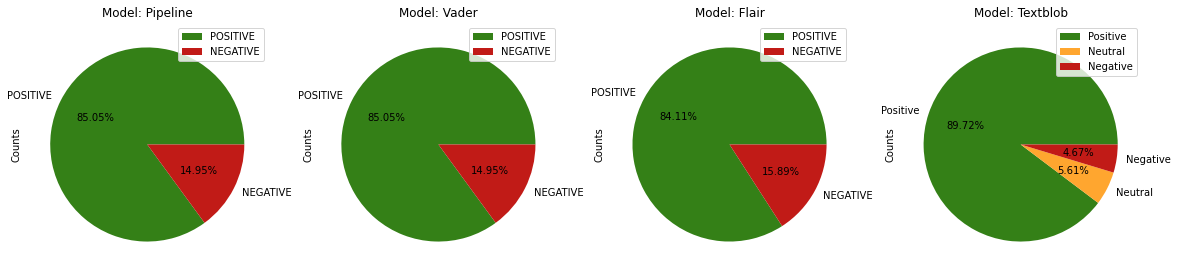

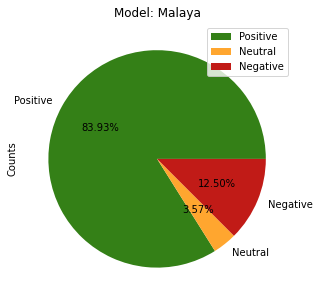

In [134]:
# Pie charts

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 20))
colors_2 = ['#348017', '#C11B17']
colors_3 = ['#348017', '#FFA62F', '#C11B17']
plot1 = dfPipelineCount.plot.pie(y='Counts', title="Model: Pipeline", ax=axes[0], colors = colors_2, autopct='%1.2f%%')
plot2 = dfVaderCount.plot.pie(y='Counts', title="Model: Vader", ax=axes[1], colors = colors_2, autopct='%1.2f%%')
plot3 = dfFlairCount.plot.pie(y='Counts', title="Model: Flair", ax=axes[2], colors = colors_2, autopct='%1.2f%%')
plot4 = dfTextblobCount.plot.pie(y='Counts', title="Model: Textblob", ax=axes[3], colors = colors_3, autopct='%1.2f%%')

plot5 = dfMalayaCount.plot.pie(y='Counts', title="Model: Malaya", colors = colors_3, figsize=(5, 5), autopct='%1.2f%%')

In [135]:
print("1. EN Model Pipeline: \n", tabulate(dfPipeline, showindex=False, headers=dfPipeline.columns))

1. EN Model Pipeline: 
 Classification       Score  Text
----------------  --------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
POSITIVE          0.999836  Fast delivery and all in good condition. Real comfortable chair.
POSITIVE          0.999542  I love the chair !!! Although pre order took quite some time but it’s really comfortable and beautiful. Smells like the interior of a new car too 😹. Thank you seller!!
POSITIVE          0.9996    Fast delivery !Nice product !Seller very nice !Like ! Like ! Like
POSITIVE          0.999643  Good product quality good value for money fast delivery date
NEGATIVE          0.933589  Bought at 27 March arrived 31 March although mentioned pre-order . Super fast delivery and worth for money
POSITIV

In [136]:
print("2. EN Model Vader: \n", tabulate(dfVader, showindex=False, headers=dfVader.columns))

2. EN Model Vader: 
   Negative    Neutral    Positive    Compound  Classification    Text
----------  ---------  ----------  ----------  ----------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     0          0.563       0.437      0.7351  Positive          Fast delivery and all in good condition. Real comfortable chair.
     0          0.534       0.466      0.9716  Positive          I love the chair !!! Although pre order took quite some time but it’s really comfortable and beautiful. Smells like the interior of a new car too 😹. Thank you seller!!
     0          0.245       0.755      0.9371  Positive          Fast delivery !Nice product !Seller very nice !Like ! Like ! Like
     0          0.461       0.539      0.802   Po

In [137]:
print("3. EN Model Flair: \n", tabulate(dfFlair, showindex=False, headers=dfFlair.columns))

3. EN Model Flair: 
   Predict  Classification    Text
---------  ----------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    0.994  POSITIVE          Fast delivery and all in good condition. Real comfortable chair.
    0.998  POSITIVE          I love the chair !!! Although pre order took quite some time but it’s really comfortable and beautiful. Smells like the interior of a new car too 😹. Thank you seller!!
    0.991  POSITIVE          Fast delivery !Nice product !Seller very nice !Like ! Like ! Like
    0.989  POSITIVE          Good product quality good value for money fast delivery date
    0.999  POSITIVE          Bought at 27 March arrived 31 March although mentioned pre-order . Super fast delivery and worth for money
   

In [138]:
print("4. EN Model Textblob: \n", tabulate(dfTextblob, showindex=False, headers=dfTextblob.columns))

4. EN Model Textblob: 
   Polarity  Classification    Text
----------  ----------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     0.5    Positive          Fast delivery and all in good condition. Real comfortable chair.
     0.61   Positive          I love the chair !!! Although pre order took quite some time but it’s really comfortable and beautiful. Smells like the interior of a new car too 😹. Thank you seller!!
     0.667  Positive          Fast delivery !Nice product !Seller very nice !Like ! Like ! Like
     0.533  Positive          Good product quality good value for money fast delivery date
     0.278  Positive          Bought at 27 March arrived 31 March although mentioned pre-order . Super fast delivery and worth for

In [139]:
print("1. BM Model Malaya: \n", tabulate(dfMalaya, showindex=False, headers=dfMalaya.columns))

1. BM Model Malaya: 
    Negative     Positive      Neutral  Classification    Text
-----------  -----------  -----------  ----------------  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
3.38062e-05  0.444764     0.00191412   Positive          ok sedap duduk atas gaming chair ni sampai tertidoq hehe tqq
7.89935e-07  0.999694     7.80832e-05  Positive          Mantap seller .. walau pre order tp pantas .. Moga murah rezeki seller .. amin
2.24747e-06  0.999443     0.000221916  Positive          Barang puas hati cuma lmbat sikit ja
5.8831e-05   0.978884     0.00582294   Positive          Barang sampai dalam keadaan baik dan terkawal dan dihantar dengan cepat oleh penjual.Cara bersembang pon amat mesra
0.99463      1.92806e-06  0.000191545